<a href="https://colab.research.google.com/github/thiagobcoelho25/auto-machine-learning/blob/main/projetos/Thiago_Ribeiro_Projeto_de_Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# Previsão de Custo de Seguro de Saúde
O objetivo deste projeto é desenvolver um projeto de Regressão para prever o custo do Seguro de Vida, com [esses dados do Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction).

O mercado de seguros vem se consolidando nos últimos anos como um dos setores mais promissores da economia nacional, com crescimento anual consistente, quase sempre na faixa de dois dígitos segundo a infomoney. De acordo com a Superintendência de Seguros Privados (Susep), o volume de prêmios dos seguros de pessoas registrou R$ 50,8 bilhões no acumulado de 2021 (janeiro a dezembro), com alta de 12,4%.

Entretanto, a penetração de seguro de vida nacional ainda está muito longe do que é percebido em mercados maduros. Em países como Estados Unidos, Japão e outras nações da Europa a porcentahem de pessoas que possuem esse tipo de seguro gira em torno de 70%, contra 17% segundo pesquisa do Instituto Datafolha. Dados da Susep de 2021 apontam que o setor tem hoje uma participação de 3,7% no PIB brasileiro, com potencial para atingir 6% a 10% – valores observados em países com mercado segurador maduro.

## Obtenção dos dados

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/insurance.csv')

## Analise dos dados

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df)


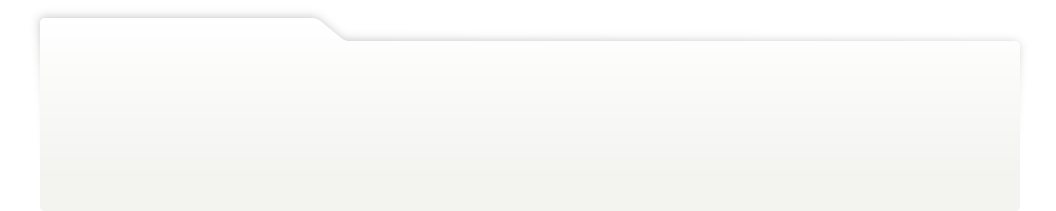
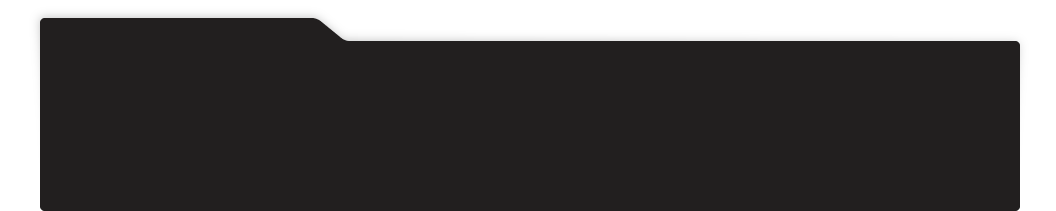
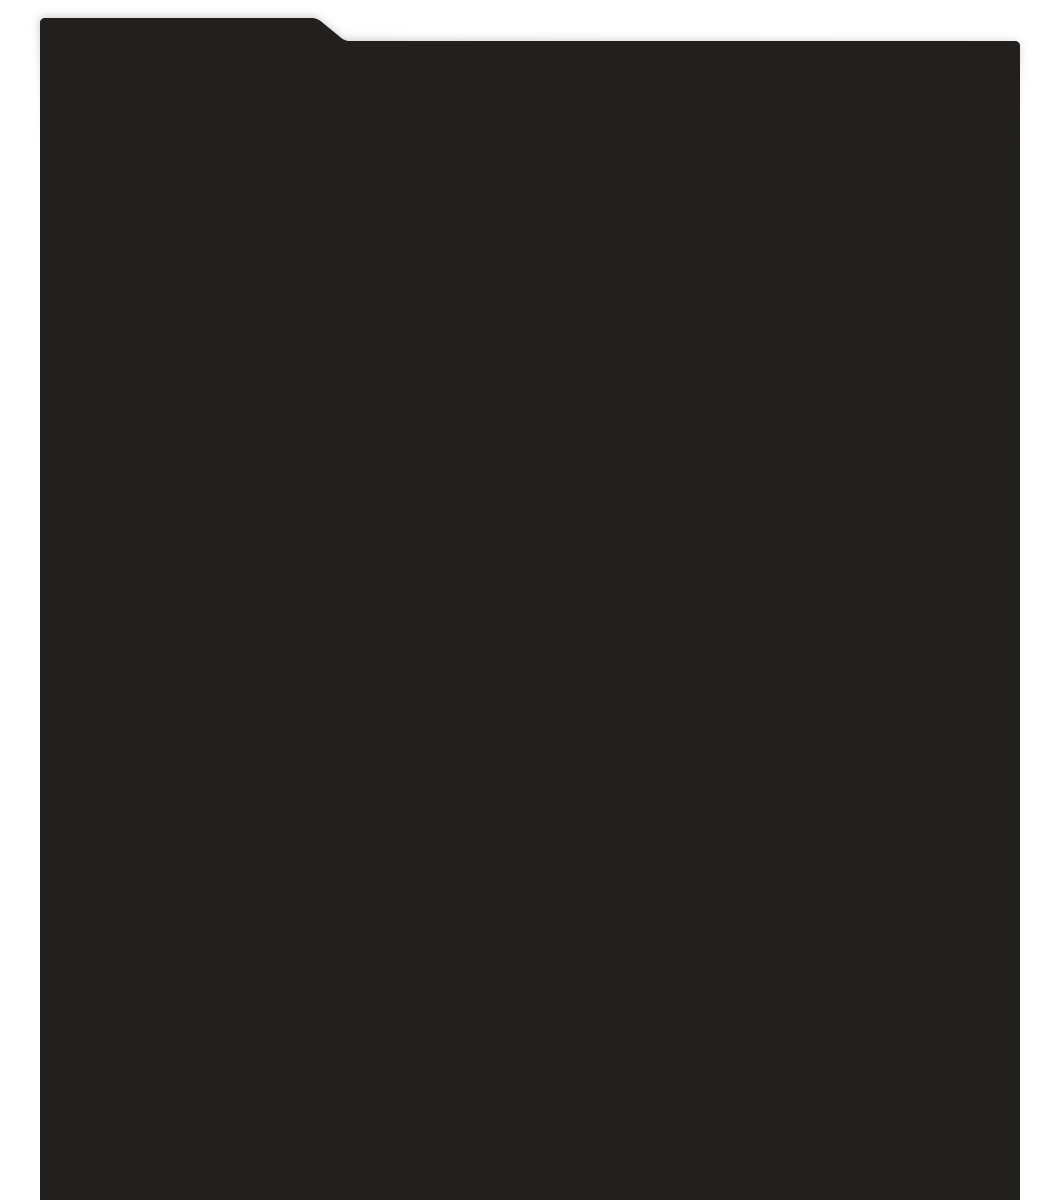
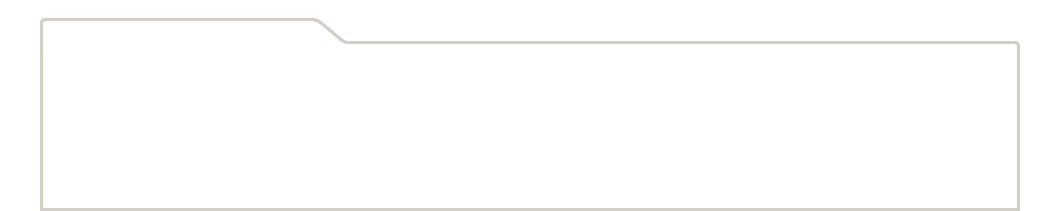
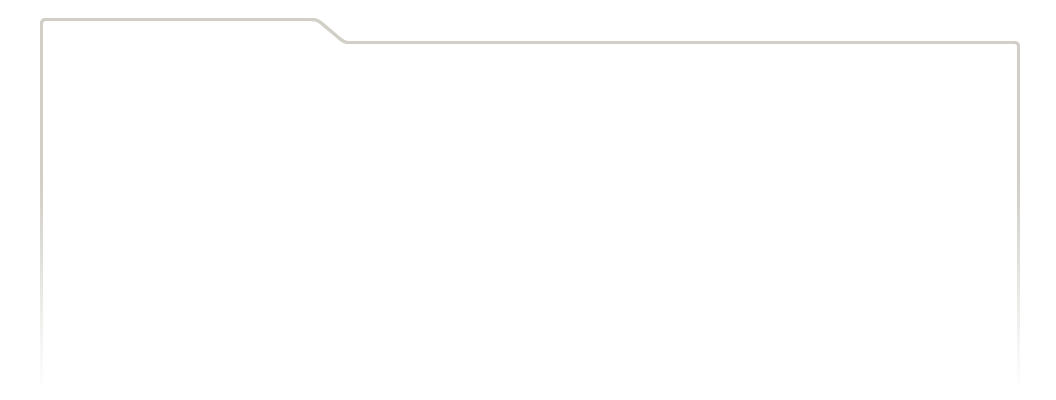
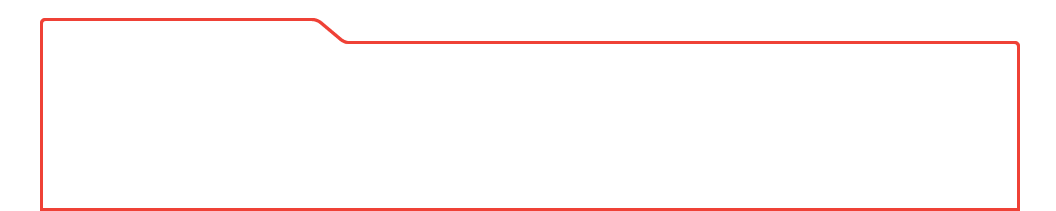
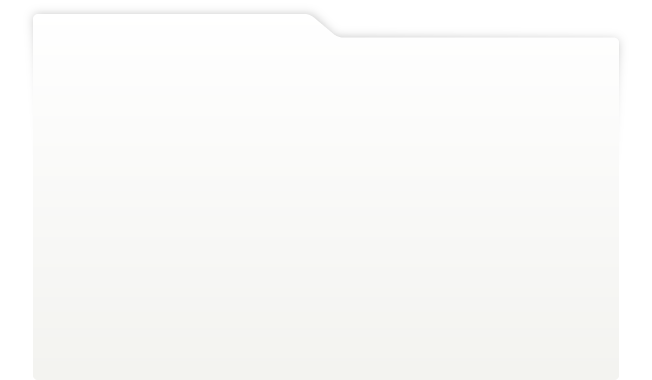
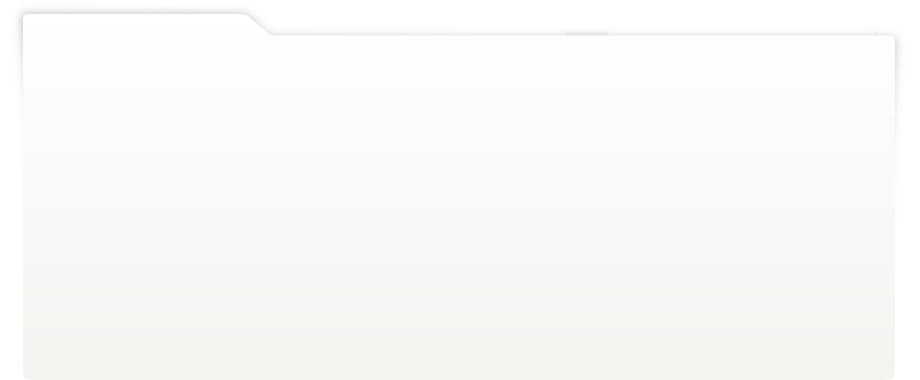
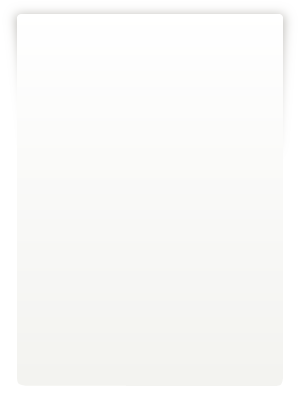
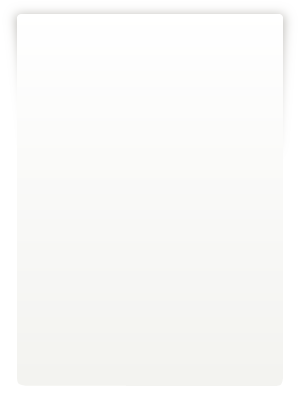
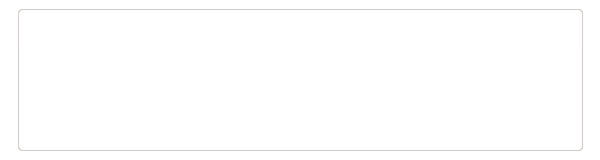
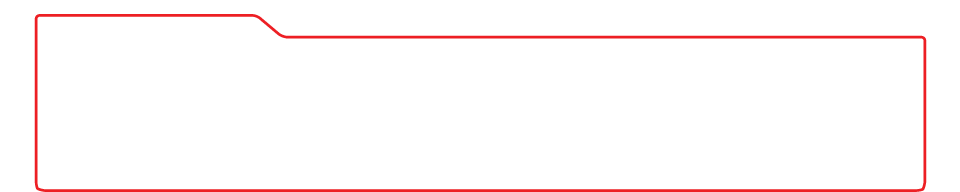
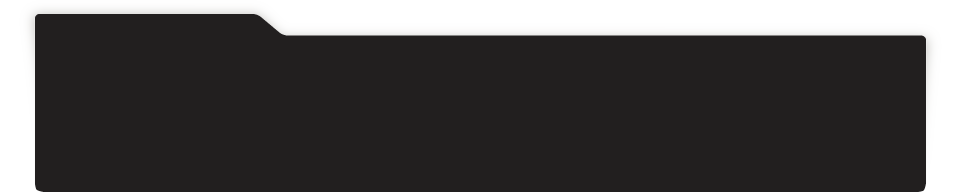
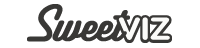
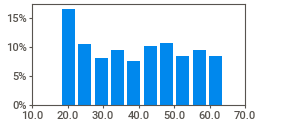
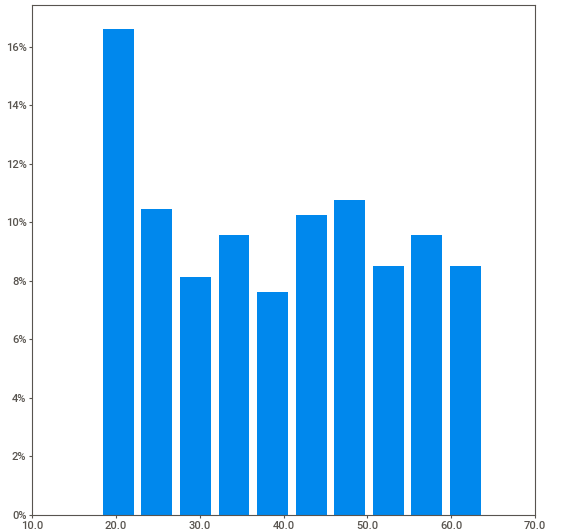
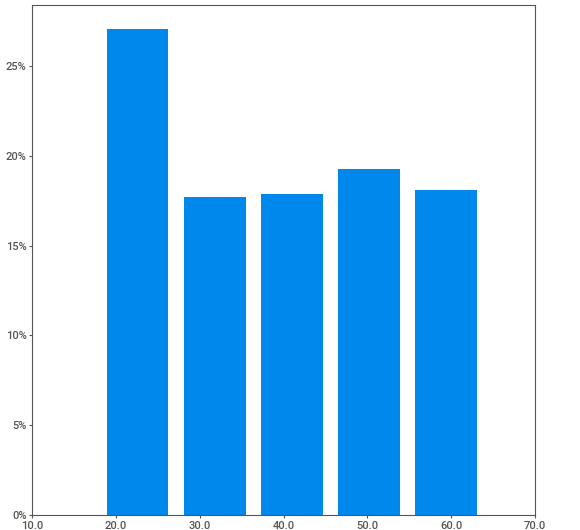
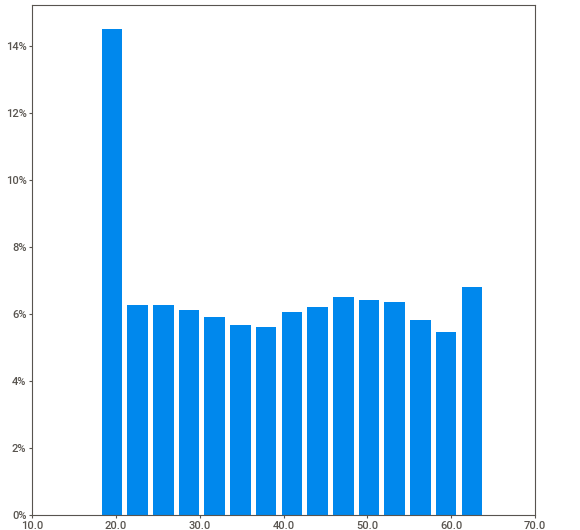
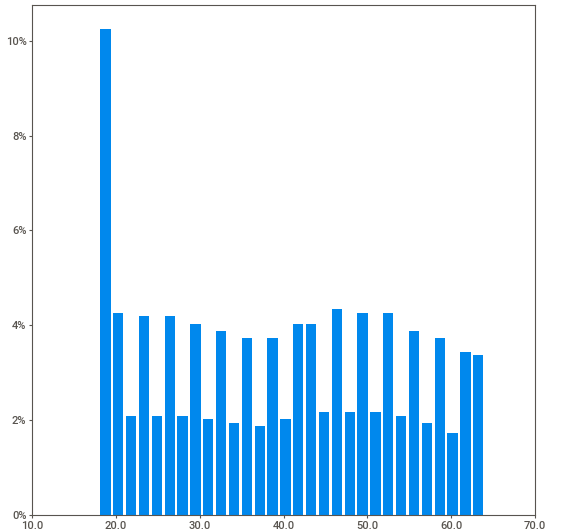
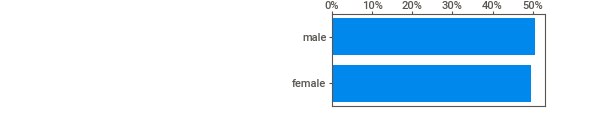
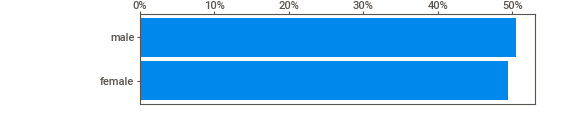
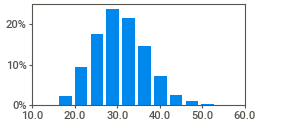
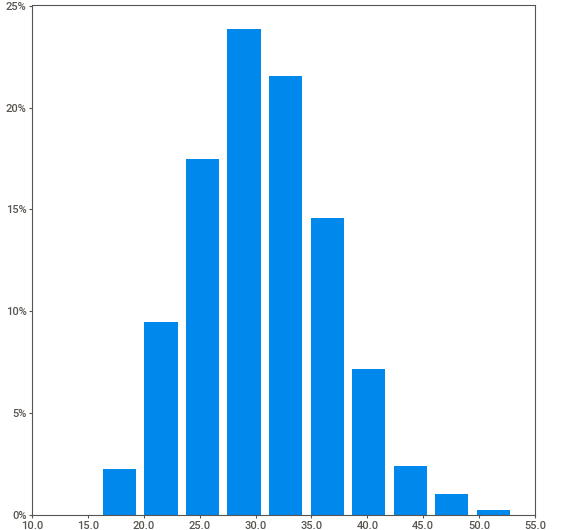
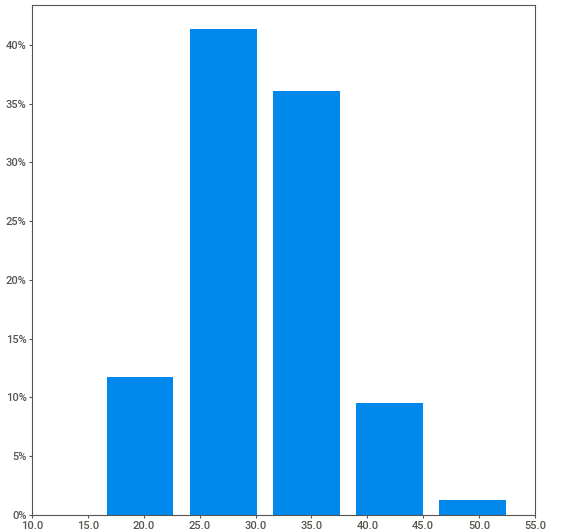
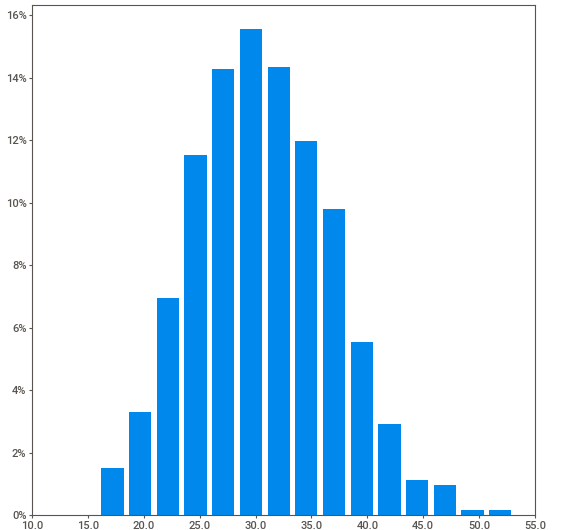
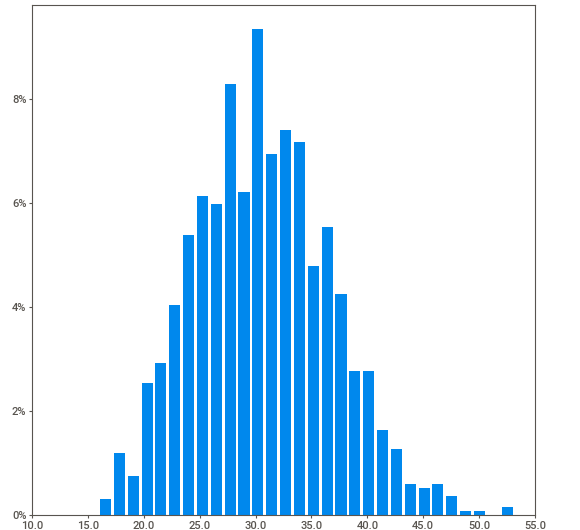
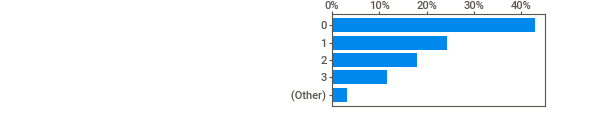
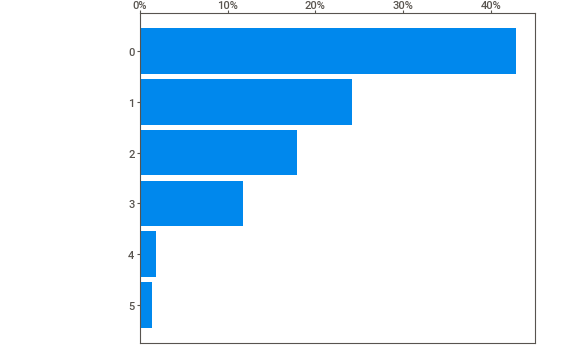
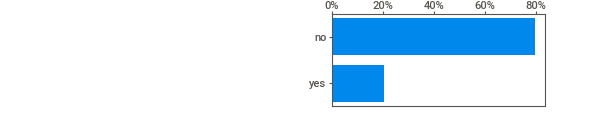
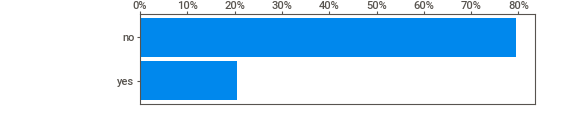
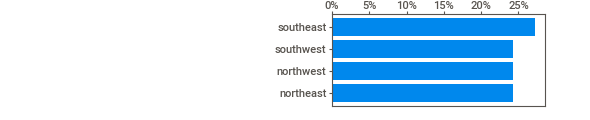
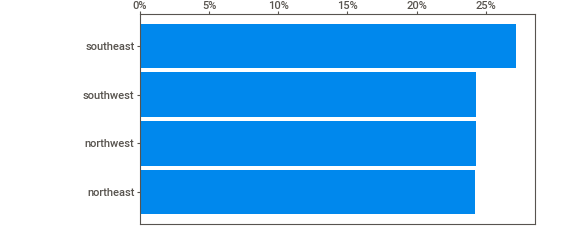
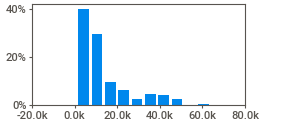
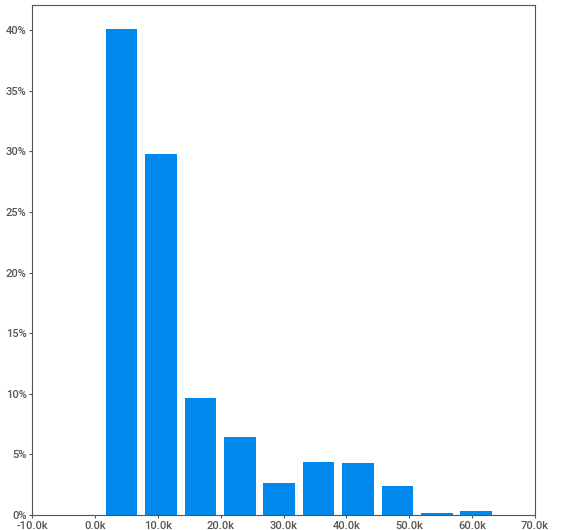
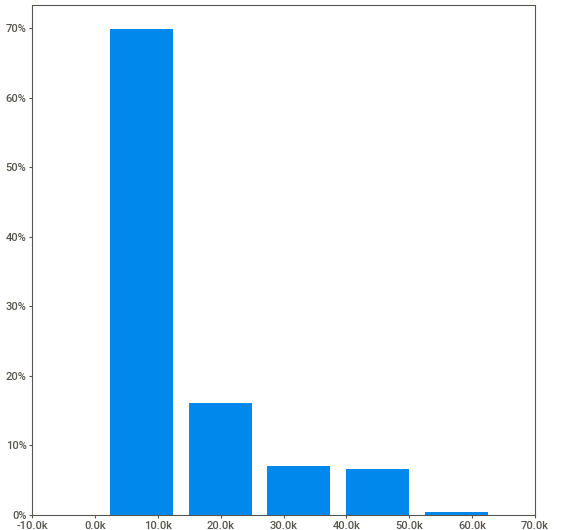
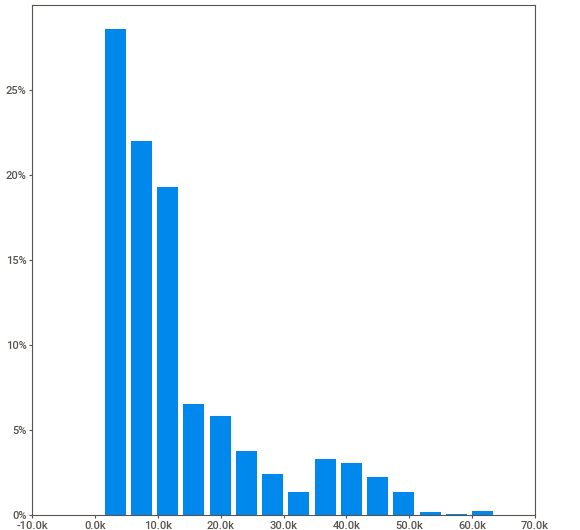
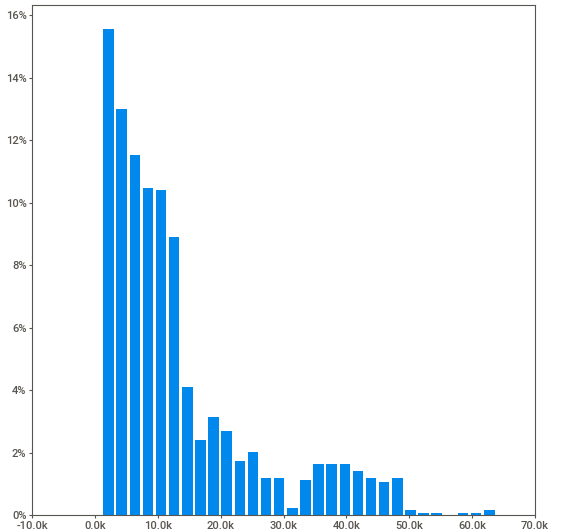
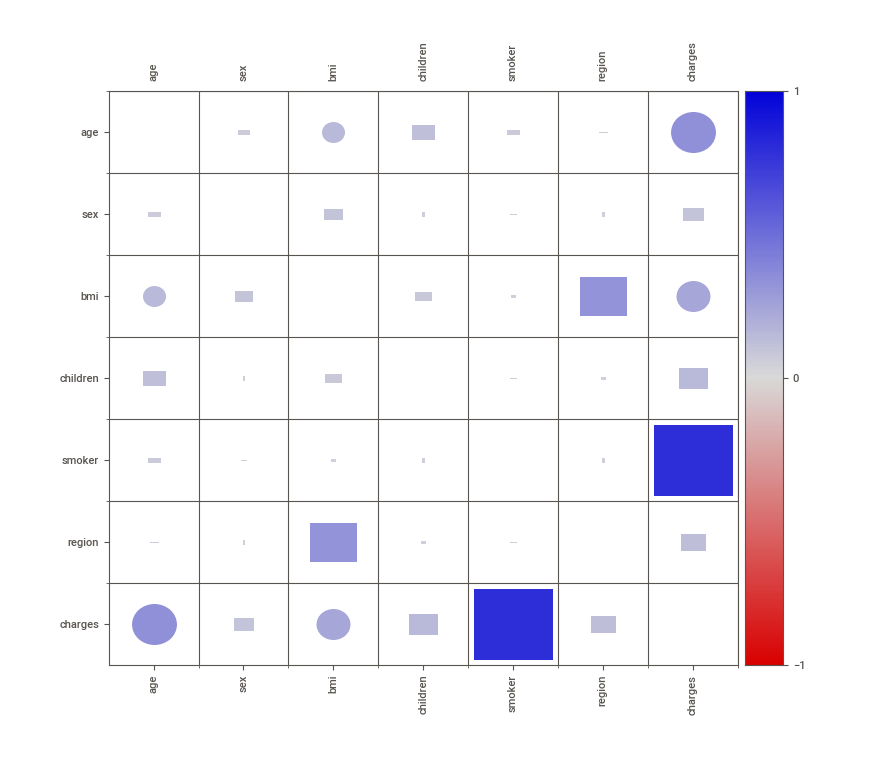
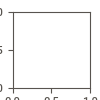

In [ ]:
report.show_notebook()

Com a API sweetviz conseguimos criar um dashboard interativo com o resumo estatistico do dataframe e suas respectivas colunas. Nele podemos observar que o dataset em questão possui **1338 entradas** com **7 colunas**, sendo 3 numericas e 4 categoricas. São elas:
* `age`: idade de cada cliente do seguro de saúde.
* `sex`: sexo de cada cliente.
* `bmi`: **IMC** ou Índice de Massa Corporal, do ingles **BMI**, é uma relação entre peso e altura. Pode ser definido como o peso em quilogramas, dividido pelo quadrado da altura em metros. Essa razão é usada para classificar se uma pessoa está abaixo do peso, com sobrepeso ou obesa.
* `children`: Quantidade de crianças que o cliente tem.
* `smoker`: Se o cliente e fumante ou não.
* `region`: Região que o cliente pertence/mora.
* `charges`: valores cobrados por cada seguro.

Neste mesmo resumo conseguimos obter alguns insights importantes como:
* O dataset não possui valores nulos em nenhuma coluna.
* `age` possui media de 39.2, mediana de 39, com maxima de 64 anos e minima de 18.
* `sex` possui 51% dos clientes do sexo masculino e 49% do sexo feminino.
* em sua maioria, clientes sem crianças representam 43%. 1% dos clientes possui 5 crianças.
* fumantes representão 20% do dataset.
* o maior valor encontrado para `charges` e de 63.770, minima de 1.122, media de 13.270 e mediana de 9.382.

Vamos observar a distribuição dos valores a partir das variaveis com o scatter plot

In [ ]:
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
grafico = px.scatter_matrix(df, dimensions=['age', 'charges', 'smoker', 'children', 'bmi', 'sex'])
grafico.show()

Com a vizualização dos scatter-plots das seguintes variaveis conseguimos ver:
* o valor `charges` segue uma mesma proporção de crescimento com a idade, sendo observado em 3 faixas.
* encontramos uma quantidade maior de valores elevados de `charges` para clientes fumantes (`smoker`).
* os maiore valores de `charges` aparecem para clientes que possuem menos filhos, em uma proporção inversa.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

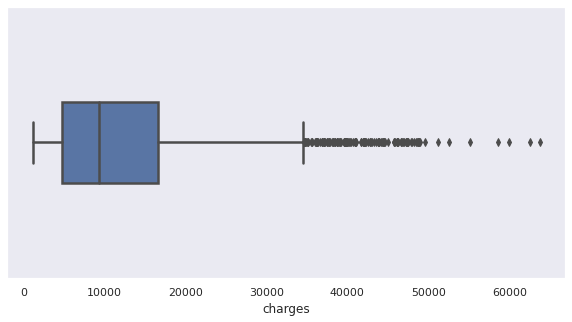

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=df['charges'], linewidth=2.5, width=0.3);

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Box(
    x=df['charges'],
    name='charges'
), row = 1, col = 1)

fig.append_trace(go.Box(
    x=df['age'],
    name='age'
), row = 2, col = 1)

fig.append_trace(go.Box(
    x=df['bmi'],
    name='bmi'
), row = 3,  col = 1)

fig.show()

Ao primeiro momento não iremos retirar os outliers das classes `charges`, devido a sua distribuição como observado nos scatter-plots anteriores e `bmi`.

In [ ]:
# quantidade de fumantes po valor de 'charger'
fig = px.histogram(df, 'charges', color="smoker")
fig.show()

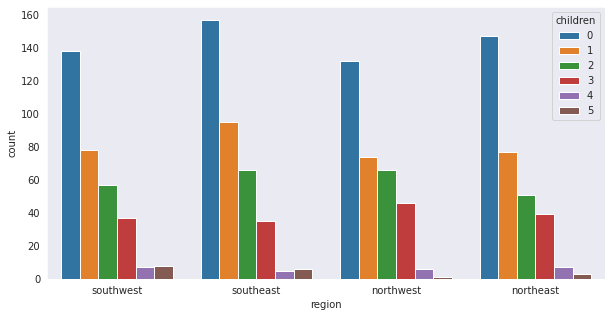

In [ ]:
# quantidade do grupo de crianças para cada região
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='region', hue="children");

In [ ]:
df_var = df.groupby(by='region')['charges'].sum()


region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64


In [ ]:
# porcentagem de quanto cada 'region' representa de 'charges'
fig = px.pie(df, values='charges', names='region', title='Porcentagem que cada regiao representa de lucro', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
# relação 'ibm' com 'age'


### Divisão dos dados

In [ ]:
test = df.sample(frac=0.20, random_state=0)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(go.Box(
    x=train['charges'],
    name='charges from train'
), row = 1, col = 1)

fig.append_trace(go.Box(
    x=test['charges'],
    name='charges from test'
), row = 2, col = 1)

fig.show()

In [ ]:
print(train.shape)
print(test.shape)

(1070, 7)
(268, 7)


## Machine Learning

In [ ]:
!pip install pycaret -q

In [ ]:
pip install markupsafe==2.0.1

In [ ]:
# configurando para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
# importando os pacotes necessários
from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model

In [ ]:
# criando o setup do PyCaret
reg = setup(data=train,
            normalize = True,
            normalize_method = 'robust',
            log_experiment = True,
            target='charges',
            experiment_name = 'health_insurance_01')

,Description,Value
0,session_id,3742
1,Target,charges
2,Original Data,"(1070, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(748, 14)"


2022/05/26 21:01:49 INFO mlflow.tracking.fluent: Experiment with name 'health_insurance_01' does not exist. Creating a new experiment.


In [ ]:
# best = compare_models()
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2539.1367,2.095436e+07,4511.7136,0.8419,0.4134,0.2947,0.094
lightgbm,Light Gradient Boosting Machine,2735.5808,2.148904e+07,4567.4167,0.8364,0.5402,0.3326,0.096
rf,Random Forest Regressor,2567.8022,2.199960e+07,4641.5521,0.8332,0.4321,0.2940,0.609
et,Extra Trees Regressor,2650.4014,2.549675e+07,4999.8760,0.8018,0.4481,0.2934,0.564
ada,AdaBoost Regressor,4406.9367,3.025503e+07,5482.3529,0.7686,0.6278,0.7404,0.048
lar,Least Angle Regression,4288.3578,3.662128e+07,6014.9085,0.7278,0.5914,0.4207,0.019
ridge,Ridge Regression,4303.2874,3.667792e+07,6018.8154,0.7277,0.5663,0.4232,0.016
llar,Lasso Least Angle Regression,4286.6805,3.665905e+07,6017.2253,0.7277,0.5695,0.4199,0.018
br,Bayesian Ridge,4300.8467,3.668543e+07,6019.2742,0.7276,0.5721,0.4228,0.025
lr,Linear Regression,4294.3874,3.669409e+07,6019.6874,0.7273,0.5976,0.4219,0.413


In [ ]:
# instanciando o modelo
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3387.6977,3.781062e+07,6149.0342,0.7520,0.5091,0.3239
1,1902.8421,1.169051e+07,3419.1386,0.9350,0.3053,0.2701
2,2268.3289,1.528550e+07,3909.6673,0.8706,0.4545,0.3582
3,2727.2885,2.638146e+07,5136.2883,0.7554,0.4293,0.2231
4,2299.9697,2.013575e+07,4487.2871,0.8693,0.3878,0.2640
5,2289.9480,1.440044e+07,3794.7918,0.9229,0.3797,0.3261
6,2879.7307,2.633542e+07,5131.8049,0.7962,0.4661,0.2817
7,2910.1420,2.345405e+07,4842.9383,0.8550,0.5347,0.4196
8,2302.1001,1.832965e+07,4281.3146,0.8904,0.3063,0.1980


In [ ]:
# tuning de parâmetros
tuned_gbr = tune_model(gbr, optimize='MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3354.6718,3.488695e+07,5906.5177,0.7712,0.5222,0.3877
1,2448.7927,1.388122e+07,3725.7505,0.9228,0.4429,0.4543
2,2207.1116,1.137020e+07,3371.9733,0.9037,0.3776,0.3072
3,2964.6541,2.768018e+07,5261.1955,0.7433,0.3928,0.2348
4,2575.6879,2.024435e+07,4499.3723,0.8685,0.4117,0.3279
5,2504.6447,1.615333e+07,4019.1208,0.9135,0.4496,0.4242
6,2899.2487,2.486621e+07,4986.6035,0.8076,0.4678,0.3164
7,2692.8067,1.947885e+07,4413.4846,0.8795,0.4614,0.3911
8,2623.4152,1.984883e+07,4455.2031,0.8813,0.3386,0.2376


In [ ]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0002, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3742, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


## Plotagem modelo

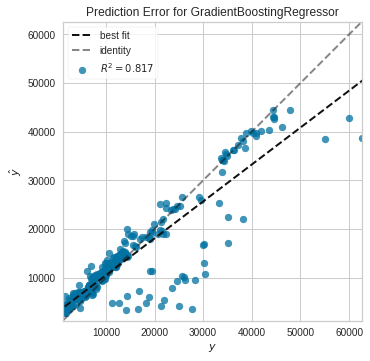

In [ ]:
# plotando matriz de confusão
plot_model(tuned_gbr, plot='error')

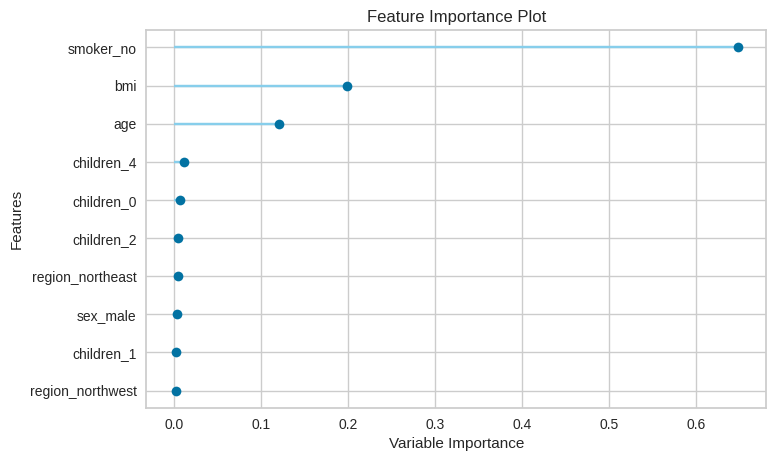

In [ ]:
# feature importances
plot_model(tuned_gbr, plot='feature')

In [ ]:
# avaliando o modelo
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Previsões

In [ ]:
# fazendo previsões
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2894.2811,2.583077e+07,5082.3985,0.8168,0.4932,0.3986


In [ ]:
# finalizando o modelo
final_gbr = finalize_model(tuned_gbr)

In [ ]:
# analisando a mudança nos resultados
predict_model(final_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2710.6651,2.295349e+07,4790.9805,0.8372,0.4796,0.3851


In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2600.4725,1.635673e+07,4044.3456,0.8972,0.4193,0.3456


,age,sex,bmi,children,smoker,region,charges,Label
0,52,male,30.200,1,no,southwest,9724.53000,12595.072435
1,47,female,29.370,1,no,southeast,8547.69130,10645.026667
2,48,male,40.565,2,yes,northwest,45702.02235,43251.436340
3,61,male,38.380,0,no,northwest,12950.07120,14631.770295
4,51,female,18.050,0,no,northwest,9644.25250,10726.408230
5,34,male,21.375,0,no,northeast,4500.33925,5479.151242
6,18,female,26.315,0,no,northeast,2198.18985,3415.680869
7,51,female,36.385,3,no,northwest,11436.73815,11303.077970
8,38,female,30.210,3,no,northwest,7537.16390,7312.404124
9,31,male,31.065,3,no,northwest,5425.02335,6278.836571


# Conclusão